In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

Number of penguins of each species on each island:
island     Biscoe  Dream  Torgersen
species                            
Adelie         44     56         52
Chinstrap       0     68          0
Gentoo        124      0          0


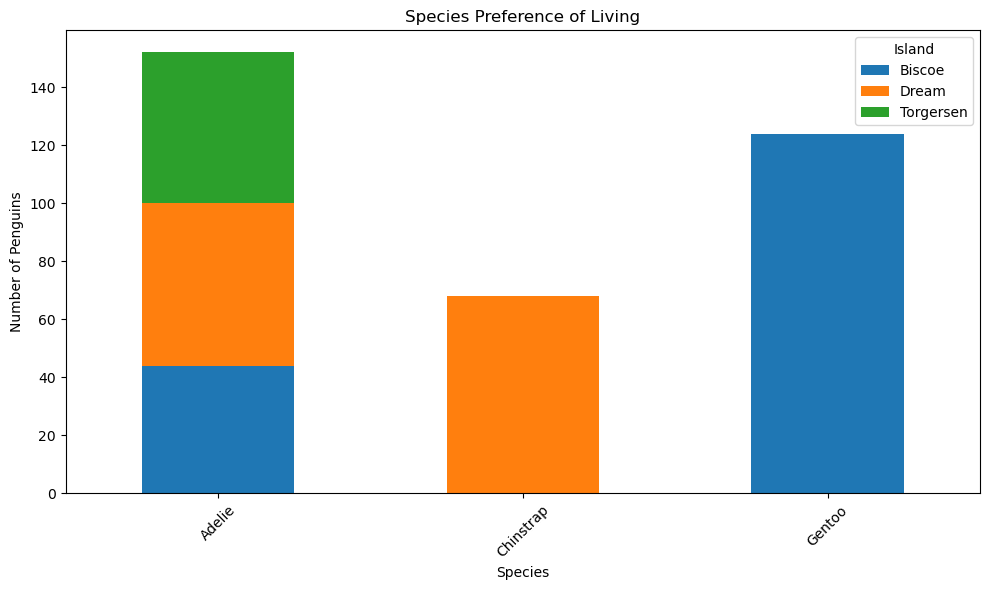

In [7]:

# Load the dataset
penguins_df = pd.read_csv("penguins_size.csv")

# Display the first few rows of the dataframe
print(penguins_df.head())

# Species preference of living: Count the number of penguins of each species on each island
species_island_counts = penguins_df.groupby(['species', 'island']).size().unstack(fill_value=0)
print("\nNumber of penguins of each species on each island:")
print(species_island_counts)

# Plot species preference of living
species_island_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Species Preference of Living')
plt.xlabel('Species')
plt.ylabel('Number of Penguins')
plt.xticks(rotation=45)
plt.legend(title='Island')
plt.tight_layout()
plt.show()





Average physical characteristics for adelies on each island:
      Island  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0     Biscoe           38.975000          18.370455           188.795455   
1      Dream           38.501786          18.251786           189.732143   
2  Torgersen           38.950980          18.429412           191.196078   

   Body Mass (g)  
0    3709.659091  
1    3688.392857  
2    3706.372549  


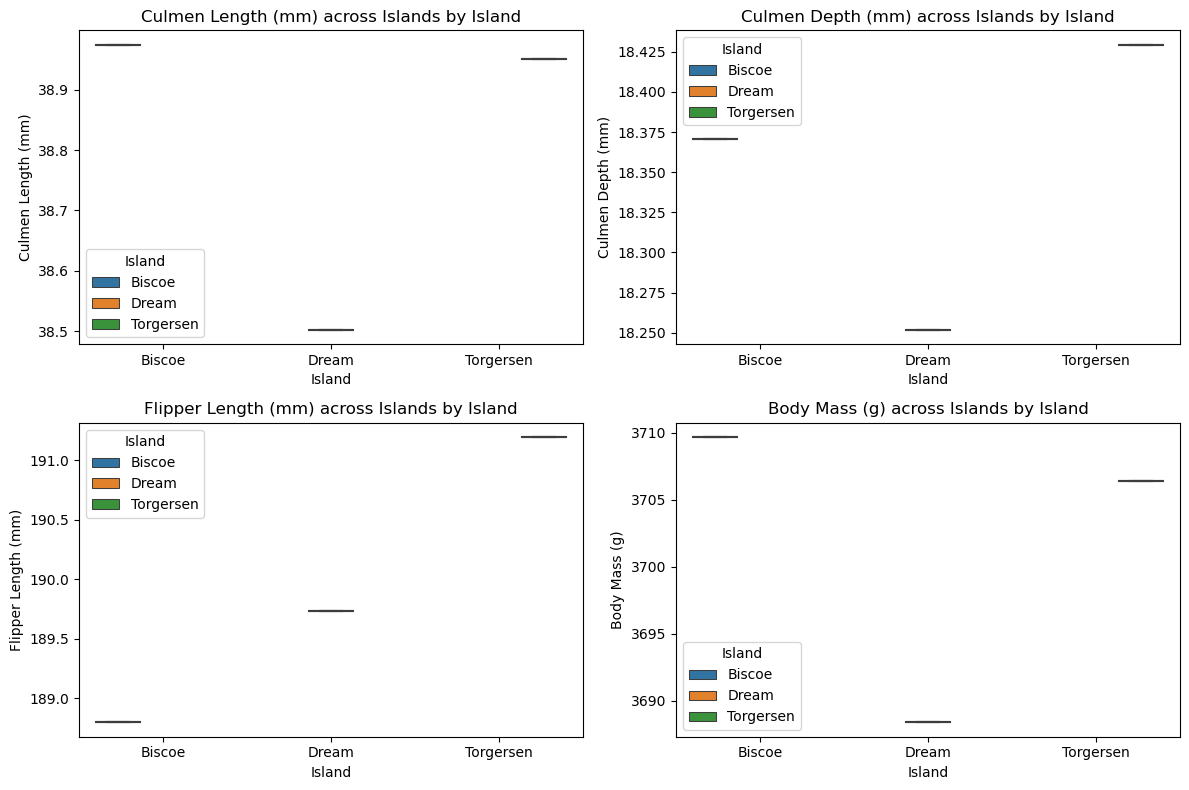

In [13]:
penguins_it = pd.read_csv("penguins_lter.csv")

adelies = penguins_it[penguins_it["Species"] == "Adelie Penguin (Pygoscelis adeliae)"]

physical_characteristics = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

# Calculate average physical characteristics for each species on each island
adelies_island_avg = adelies.groupby(['Island'])[physical_characteristics].mean().reset_index()
print("\nAverage physical characteristics for adelies on each island:")
print(adelies_island_avg)

# Plot influence of habitats on physical characteristics
plt.figure(figsize=(12, 8))
for i, char in enumerate(physical_characteristics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=adelies_island_avg, x='Island', y=char, hue='Island')
    plt.title(f'{char} across Adelies by Island')
    plt.xlabel('Island')
    plt.ylabel(char)
    plt.legend(title='Island')
plt.tight_layout()
plt.show()